# Gene weights

Our samples are distributed across multiple gene panels, each panel containing different target genes. To figure out how these genes are distributed across our panels, and the panels are distributed accross out samples, we have to examine this.

In *clinical_sample.txt* there is *Sequence Assay ID* which is an ID for the gene panel being used. In the gene_panels folder, there is one file containing a list of the genes being targeted for each panel type.

The goal of this script is to find the weight of each gene in the dataset based on this information.

### Setup

In [1]:
library("ggplot2")
library(stringr)
library(data.table)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


## Gene panels

We start by looking at the gene panel data.

### Loading in the data

I would like to start by loading in the gene_panel data.

In [2]:
# We create a list of all the files in the gene_panel folder and save it as a string
gene_panels_list <- "data_gene_panel_CHOP-COMPT.txt
data_gene_panel_CHOP-COMPT-V2.txt
data_gene_panel_CHOP-FUSIP.txt
data_gene_panel_CHOP-HEMEP.txt
data_gene_panel_CHOP-STNGS.txt
data_gene_panel_CHOP-STNGS-V2.txt
data_gene_panel_COLU-CCCP-V1.txt
data_gene_panel_COLU-CCCP-V2.txt
data_gene_panel_COLU-CSTP-V1.txt
data_gene_panel_COLU-CSTP-V2.txt
data_gene_panel_COLU-TSACP-V1.txt
data_gene_panel_CRUK-TS.txt
data_gene_panel_DFCI-ONCOPANEL-1.txt
data_gene_panel_DFCI-ONCOPANEL-2.txt
data_gene_panel_DFCI-ONCOPANEL-3.1.txt
data_gene_panel_DFCI-ONCOPANEL-3.txt
data_gene_panel_DUKE-F1-DX1.txt
data_gene_panel_DUKE-F1-T5A.txt
data_gene_panel_DUKE-F1-T7.txt
data_gene_panel_GRCC-CHP2.txt
data_gene_panel_GRCC-CP1.txt
data_gene_panel_GRCC-MOSC3.txt
data_gene_panel_GRCC-MOSC4.txt
data_gene_panel_GRCC-OCAV3.txt
data_gene_panel_GRCC-SAFIR02.txt
data_gene_panel_JHU-500STP.txt
data_gene_panel_JHU-50GP.txt
data_gene_panel_MDA-409-V1.txt
data_gene_panel_MDA-46-V1.txt
data_gene_panel_MDA-50-V1.txt
data_gene_panel_MSK-ACCESS129.txt
data_gene_panel_MSK-IMPACT341.txt
data_gene_panel_MSK-IMPACT410.txt
data_gene_panel_MSK-IMPACT468.txt
data_gene_panel_MSK-IMPACT505.txt
data_gene_panel_MSK-IMPACT-HEME-400.txt
data_gene_panel_MSK-IMPACT-HEME-468.txt
data_gene_panel_NKI-CHPV2-NGS.txt
data_gene_panel_NKI-CHP-V2-PLUS.txt
data_gene_panel_NKI-CHPV2-SOCV2-NGS.txt
data_gene_panel_NKI-PATH-NGS.txt
data_gene_panel_NKI-TSACP-MISEQ-NGS.txt
data_gene_panel_PROV-FOCUS-V1.txt
data_gene_panel_PROV-TSO500HT-V2.txt
data_gene_panel_PROV-TST170-V1.txt
data_gene_panel_SCI-PMP68-V1.txt
data_gene_panel_UCHI-ONCOHEME55-V1.txt
data_gene_panel_UCHI-ONCOSCREEN50-V1.txt
data_gene_panel_UCSF-IDTV5-TN.txt
data_gene_panel_UCSF-IDTV5-TO.txt
data_gene_panel_UCSF-NIMV4-TN.txt
data_gene_panel_UCSF-NIMV4-TO.txt
data_gene_panel_UHN-48-V1.txt
data_gene_panel_UHN-50-V2.txt
data_gene_panel_UHN-54-V1.txt
data_gene_panel_UHN-555-BLADDER-V1.txt
data_gene_panel_UHN-555-BREAST-V1.txt
data_gene_panel_UHN-555-GLIOMA-V1.txt
data_gene_panel_UHN-555-GYNE-V1.txt
data_gene_panel_UHN-555-HEAD-NECK-V1.txt
data_gene_panel_UHN-555-LUNG-V1.txt
data_gene_panel_UHN-555-MELANOMA-V1.txt
data_gene_panel_UHN-555-PAN-GI-V1.txt
data_gene_panel_UHN-555-PROSTATE-V1.txt
data_gene_panel_UHN-555-RENAL-V1.txt
data_gene_panel_UHN-555-V1.txt
data_gene_panel_UHN-555-V2.txt
data_gene_panel_UHN-OCA-V3.txt
data_gene_panel_UHN-TSO500-V1.txt
data_gene_panel_VHIO-300.txt
data_gene_panel_VHIO-BILIARY-V01.txt
data_gene_panel_VHIO-BRAIN-V01.txt
data_gene_panel_VHIO-BREAST-V01.txt
data_gene_panel_VHIO-BREAST-V02.txt
data_gene_panel_VHIO-COLORECTAL-V01.txt
data_gene_panel_VHIO-ENDOMETRIUM-V01.txt
data_gene_panel_VHIO-GASTRIC-V01.txt
data_gene_panel_VHIO-GENERAL-V01.txt
data_gene_panel_VHIO-HEAD-NECK-V01.txt
data_gene_panel_VHIO-KIDNEY-V01.txt
data_gene_panel_VHIO-LUNG-V01.txt
data_gene_panel_VHIO-OVARY-V01.txt
data_gene_panel_VHIO-PANCREAS-V01.txt
data_gene_panel_VHIO-PAROTIDE-V01.txt
data_gene_panel_VHIO-SKIN-V01.txt
data_gene_panel_VHIO-URINARY-BLADDER-V01.txt
data_gene_panel_VICC-01-D2.txt
data_gene_panel_VICC-01-DX1.txt
data_gene_panel_VICC-01-MYELOID.txt
data_gene_panel_VICC-01-SOLIDTUMOR.txt
data_gene_panel_VICC-01-T4B.txt
data_gene_panel_VICC-01-T5A.txt
data_gene_panel_VICC-01-T6B.txt
data_gene_panel_VICC-01-T7.txt
data_gene_panel_VICC-02-XTV2.txt
data_gene_panel_VICC-02-XTV3.txt
data_gene_panel_VICC-02-XTV4.txt
data_gene_panel_WAKE-CA-01.txt
data_gene_panel_WAKE-CA-NGSQ3.txt
data_gene_panel_WAKE-CLINICAL-AB1.txt
data_gene_panel_WAKE-CLINICAL-AB2.txt
data_gene_panel_WAKE-CLINICAL-AB3.txt
data_gene_panel_WAKE-CLINICAL-CF2.txt
data_gene_panel_WAKE-CLINICAL-CF3.txt
data_gene_panel_WAKE-CLINICAL-D2.txt
data_gene_panel_WAKE-CLINICAL-DX1.txt
data_gene_panel_WAKE-CLINICAL-R2D2.txt
data_gene_panel_WAKE-CLINICAL-R2.txt
data_gene_panel_WAKE-CLINICAL-T5A.txt
data_gene_panel_WAKE-CLINICAL-T7.txt
data_gene_panel_YALE-HSM-V1.txt
data_gene_panel_YALE-OCP-V2.txt
data_gene_panel_YALE-OCP-V3.txt"

# Then we split the string into string elements, so that we have each file name as an element in a list
gene_panels_list <- strsplit(gene_panels_list, '\n')

# We update the list with indexing into the first column, because there is only one column.
# This will make looping through the names easier
gene_panels_list <- gene_panels_list[[1]]

## Just to see how many panels we have, we get the length of our new list
#length(gene_panels_list)

In [3]:
# Because there are so many elements, a loop is usefull
# We are not interested in manually loading in and formatting each file

# We create a panel name list for later
panel_name_list <- list()

for (panel in gene_panels_list) {
    # We extract the panel name (removing 'data_gene_panel_' and '.txt')
    panel_name <- substr(panel, 17, nchar(panel)-4)
    # We also have to replace '-' with '_' for R to use it as a variable name later
    panel_name <- gsub("-", "_", panel_name)
    
    # We save the name of each panel in a list
    panel_name_list[[length(panel_name_list)+1]] <- panel_name
    
    # We define the panel file path
    panel_file_path <- paste("../../data/genie_v15/gene_panels/", panel, sep="")
    
    # We read in the file as lines to a temporary file
    tmp <- readLines(panel_file_path)
    
    # Then, we assign the panel name to the third line in our temporary file
    # The third line contains the gene names, seperated by tabs
    # Again we index into the results first column [[1]]
    # And we remove the first element, which is the tittle 'gene_list'
    assign(panel_name, (strsplit(tmp[3], '\t')[[1]][-1]))
}

Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_CHOP-COMPT.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_CHOP-COMPT-V2.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_CHOP-FUSIP.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_CHOP-HEMEP.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_CHOP-STNGS.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_CHOP-STNGS-V2.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_

Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_UHN-555-BREAST-V1.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_UHN-555-GLIOMA-V1.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_UHN-555-GYNE-V1.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_UHN-555-HEAD-NECK-V1.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_UHN-555-LUNG-V1.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_UHN-555-MELANOMA-V1.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '.

Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_YALE-OCP-V2.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_YALE-OCP-V3.txt'”


In [4]:
## To verify that it worked, I want
# 1) The length of the panel list
length(panel_name_list)

# The first name on the panel list
panel_name_list[1]

# And the head of the first element in the panel list
head(CHOP_COMPT)

# It seems to have worked :-D

[1] 113

[[1]]
[1] "CHOP_COMPT"

[1] "MUTYH"  "FGF19"  "DDR2"   "HRAS"   "CDKN2A" "TP53"

### Weights


Now that the data has been succesfully loaded, we want to figure out how many times each gene is present across the panels.

In [5]:
## I want to print this, so that I can copy it to the next code chunck, and remove the quotation marks, making it easy to create a list
#tmp <- paste(panel_name_list, collapse=",")
#print(tmp)

In [6]:
# I create the list with acctual elements, not the names of those elements
panel_elements_list <- list(CHOP_COMPT,CHOP_COMPT_V2,CHOP_FUSIP,CHOP_HEMEP,CHOP_STNGS,CHOP_STNGS_V2,COLU_CCCP_V1,COLU_CCCP_V2,COLU_CSTP_V1,COLU_CSTP_V2,COLU_TSACP_V1,CRUK_TS,DFCI_ONCOPANEL_1,DFCI_ONCOPANEL_2,DFCI_ONCOPANEL_3.1,DFCI_ONCOPANEL_3,DUKE_F1_DX1,DUKE_F1_T5A,DUKE_F1_T7,GRCC_CHP2,GRCC_CP1,GRCC_MOSC3,GRCC_MOSC4,GRCC_OCAV3,GRCC_SAFIR02,JHU_500STP,JHU_50GP,MDA_409_V1,MDA_46_V1,MDA_50_V1,MSK_ACCESS129,MSK_IMPACT341,MSK_IMPACT410,MSK_IMPACT468,MSK_IMPACT505,MSK_IMPACT_HEME_400,MSK_IMPACT_HEME_468,NKI_CHPV2_NGS,NKI_CHP_V2_PLUS,NKI_CHPV2_SOCV2_NGS,NKI_PATH_NGS,NKI_TSACP_MISEQ_NGS,PROV_FOCUS_V1,PROV_TSO500HT_V2,PROV_TST170_V1,SCI_PMP68_V1,UCHI_ONCOHEME55_V1,UCHI_ONCOSCREEN50_V1,UCSF_IDTV5_TN,UCSF_IDTV5_TO,UCSF_NIMV4_TN,UCSF_NIMV4_TO,UHN_48_V1,UHN_50_V2,UHN_54_V1,UHN_555_BLADDER_V1,UHN_555_BREAST_V1,UHN_555_GLIOMA_V1,UHN_555_GYNE_V1,UHN_555_HEAD_NECK_V1,UHN_555_LUNG_V1,UHN_555_MELANOMA_V1,UHN_555_PAN_GI_V1,UHN_555_PROSTATE_V1,UHN_555_RENAL_V1,UHN_555_V1,UHN_555_V2,UHN_OCA_V3,UHN_TSO500_V1,VHIO_300,VHIO_BILIARY_V01,VHIO_BRAIN_V01,VHIO_BREAST_V01,VHIO_BREAST_V02,VHIO_COLORECTAL_V01,VHIO_ENDOMETRIUM_V01,VHIO_GASTRIC_V01,VHIO_GENERAL_V01,VHIO_HEAD_NECK_V01,VHIO_KIDNEY_V01,VHIO_LUNG_V01,VHIO_OVARY_V01,VHIO_PANCREAS_V01,VHIO_PAROTIDE_V01,VHIO_SKIN_V01,VHIO_URINARY_BLADDER_V01,VICC_01_D2,VICC_01_DX1,VICC_01_MYELOID,VICC_01_SOLIDTUMOR,VICC_01_T4B,VICC_01_T5A,VICC_01_T6B,VICC_01_T7,VICC_02_XTV2,VICC_02_XTV3,VICC_02_XTV4,WAKE_CA_01,WAKE_CA_NGSQ3,WAKE_CLINICAL_AB1,WAKE_CLINICAL_AB2,WAKE_CLINICAL_AB3,WAKE_CLINICAL_CF2,WAKE_CLINICAL_CF3,WAKE_CLINICAL_D2,WAKE_CLINICAL_DX1,WAKE_CLINICAL_R2D2,WAKE_CLINICAL_R2,WAKE_CLINICAL_T5A,WAKE_CLINICAL_T7,YALE_HSM_V1,YALE_OCP_V2,YALE_OCP_V3)

## Checking if it works
#panel_elements_list[[1]][1]

I would like to create a data.table wherein gene names are in the first column and counts are in the next column.

To acchieve this I would like to start by creating an empty matrix, and then loop though gene panels, and the genes listed in each panel. If the gene already has a row, we simply +1 to the count. If not, we must create the row with a value of 1. When this data.frame has been creates, I would like to save it. After that we can create a new column containing max-normalized weights.

In [7]:
# We create an empty table wherein we can store gene names and a count of their occurance in the files
gene_count_table <- data.frame(genes = character(0), count = numeric(0))

# We run through each panel, and each gene in that pannel
for (panel in panel_elements_list) {
    for (gene in panel) {
        # If the gene is not already in the dataframe, we add it with a count of one
        if (!(gene %in% gene_count_table$genes)){
            gene_count_table[nrow(gene_count_table) + 1,] = c(gene, 1)
            }
        # If it already exists, we update the count with one
        else{
            row_index = which(gene_count_table$genes == gene)
            gene_count_table$count[row_index] <- as.integer(gene_count_table$count[row_index]) + 1
        }
    }
}

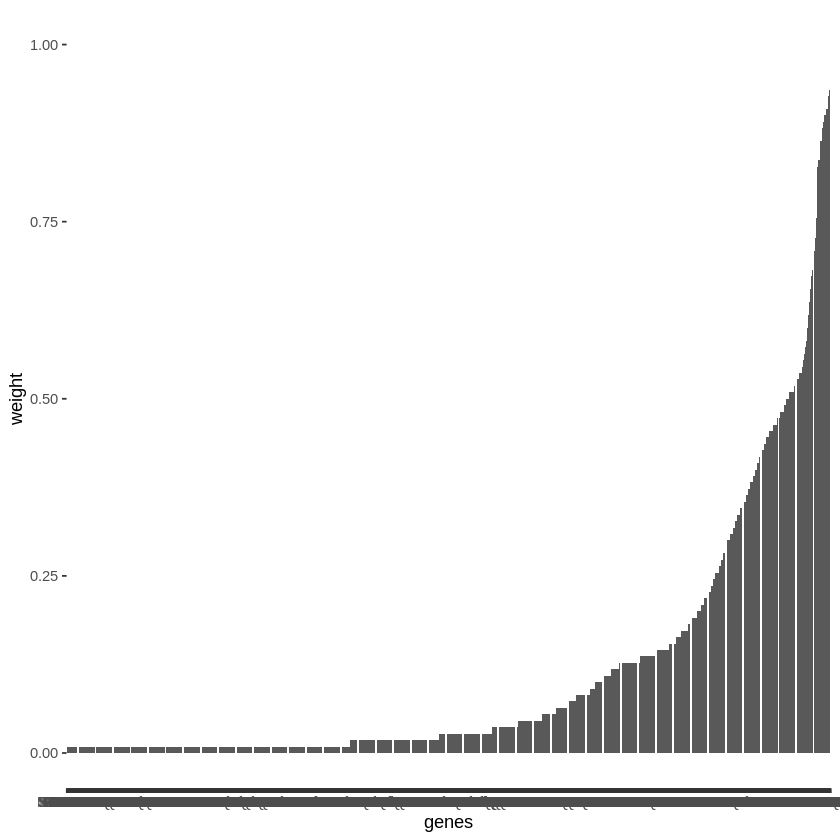

In [8]:
# We get the highest value 
gene_count_max <- max(as.numeric(gene_count_table$count))

# And normalize based on the max value
gene_count_table$weight <- (as.numeric(gene_count_table$count) / gene_count_max)

# We define the position based on a list sorted by weight
positions <- gene_count_table[order(gene_count_table$weight), 1]

# Then we plot the weights, as a sanity check to see if
# 1) The distibution is the same as before normalisation, and
# 2) That the values lie between 0 and 1
ggplot(gene_count_table, aes(x = genes, y = weight)) +
 geom_bar(stat="identity") +
 scale_x_discrete(limits = positions)

We save the results in a .csv file for potential later use.

In [9]:
write.csv(gene_count_table, "../../derived_data/genie_v15/gene_weights.csv", row.names=TRUE)

## Panels

Ideally I would like to account for how often a panel is used. We start by making a vector containing weights of each type of pannel. So, that is the goal of the next section.

#### Loading the data

In [10]:
sample_data <- read.table("../../data/genie_v15/data_clinical_sample.txt", sep="\t", quote="", head=TRUE)
dim(sample_data)
head(sample_data)

[1] 198041      9

,PATIENT_ID,SAMPLE_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GENIE-VICC-101416,GENIE-VICC-101416-unk-1,52,MAAP,Primary,VICC-01-T7,Appendiceal Cancer,Mucinous Adenocarcinoma of the Appendix,Primary tumor
2,GENIE-VICC-102225,GENIE-VICC-102225-unk-1,31,READ,Metastasis,VICC-01-T7,Colorectal Cancer,Rectal Adenocarcinoma,Metastasis site unspecified
3,GENIE-VICC-102424,GENIE-VICC-102424-unk-1,63,SCCNOS,Metastasis,VICC-01-T7,Cancer of Unknown Primary,"Squamous Cell Carcinoma, NOS",Metastasis site unspecified
4,GENIE-VICC-102966,GENIE-VICC-102966-unk-1,64,LUAD,Metastasis,VICC-01-T7,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Metastasis site unspecified
5,GENIE-VICC-103244,GENIE-VICC-103244-unk-1,50,IDC,Primary,VICC-01-T5A,Breast Cancer,Breast Invasive Ductal Carcinoma,Primary tumor
6,GENIE-VICC-103477,GENIE-VICC-103477-unk-1,40,MRLS,Primary,VICC-01-D2,Soft Tissue Sarcoma,Myxoid/Round-Cell Liposarcoma,Primary tumor


#### Weights

Calculating the weights for each type of panel.

In [11]:
# Creating the empty dataframe
panel_count_table <- data.frame(panel = character(0), count = numeric(0))

# Getting the unique IDs of each sequence assay
panel_name_list <- unique(sample_data$SEQ_ASSAY_ID)

# Running through each panel
for (name in panel_name_list){
    # Finding the number of matches
    matches <- length(which(sample_data$SEQ_ASSAY_ID == name))
    # adding the name of the panel and the number of occurances to the table
    panel_count_table[nrow(panel_count_table) + 1,] <- list(name, matches)
}

# Examining the result
head(panel_count_table)
dim(panel_count_table)

,panel,count
,<chr>,<dbl>
1,VICC-01-T7,1623
2,VICC-01-T5A,401
3,VICC-01-D2,160
4,VICC-01-MYELOID,1784
5,VICC-01-T4B,28
6,VICC-02-XTV4,449


[1] 113   2

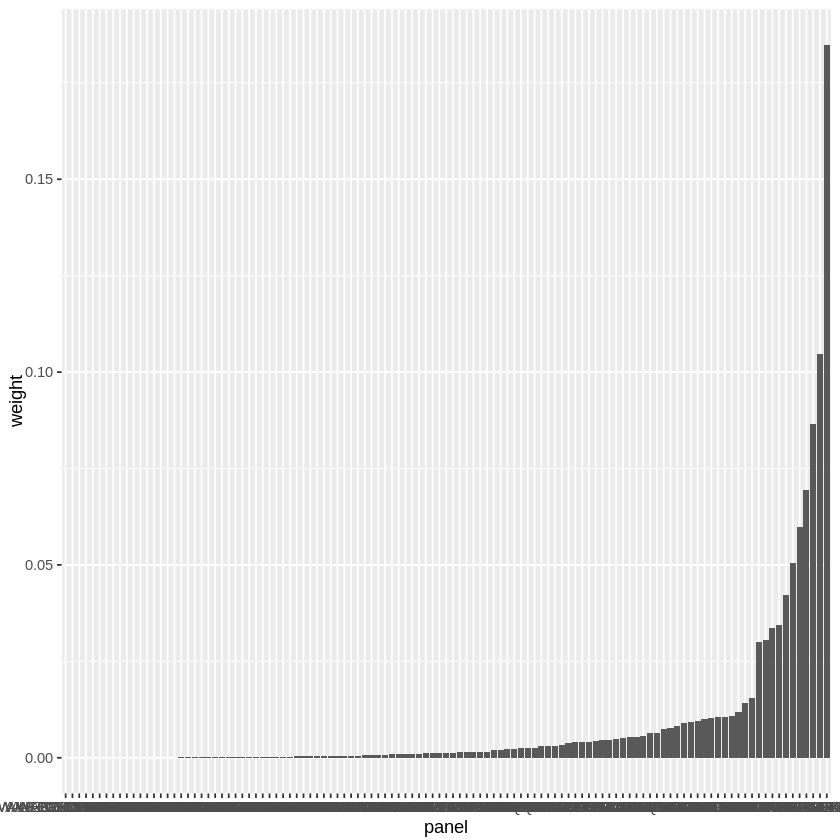

In [12]:
# We get the sum 
panel_sum <- sum(as.numeric(panel_count_table$count))

# And normalize based on the sum value
panel_count_table$weight <- (as.numeric(panel_count_table$count) / panel_sum)

# We define the position based on a list sorted by weight
positions <- panel_count_table[order(panel_count_table$weight), 1]

# Then we plot the weights, as a sanity check to see if
# 1) The distibution is the same as before normalisation, and
# 2) That the values lie between 0 and 1
ggplot(panel_count_table, aes(x = panel, y = weight)) +
 geom_bar(stat="identity") +
 scale_x_discrete(limits = positions)

In [13]:
positions[113]
max(panel_count_table$count)

positions[1]
min(panel_count_table$count)

[1] "MSK-IMPACT468"

[1] 36610

[1] "WAKE-CLINICAL-AB3"

[1] 1

The panel that is most often used is MSK-IMPACT468, with 36.610 instances in sample_data$SEQ_ASSAY_ID. We save the results in a .csv file for later use.

In [14]:
write.csv(panel_count_table, "../../derived_data/genie_v15/panel_weights.csv", row.names=TRUE)

## Combining panel and gene

To combine panel and gene information and get a truer weight for each gene, I want to match the weight of each gene being added to a new table by which panel it comes from. Basically:

    for panel in panel_list:
        for gene in panel:
            table[gene] += panel_count
        
This weight should account for the skew in which pannels were being used, and the resulting distribution of genes could be interesting. Because floats are quite tricky, we start by using panel_count as weights for each gene, and then we max-normalize.

In case a gene is only in one panel, but that panl is widely used, it should have a low weight which would not have been seen in the previous distribution. Vise-versa, a gene prevalent among the panels, but those panels being used very infrequently, should have a low weight.

In [15]:
# weight of panels in: panel_count_table
 
# We need the name of each panel in the order they exist in panel_elements_list to look them up in panel_count_table
panel_name_list <- list("CHOP_COMPT", "CHOP_COMPT_V2", "CHOP_FUSIP", "CHOP_HEMEP", "CHOP_STNGS", "CHOP_STNGS_V2", "COLU_CCCP_V1", "COLU_CCCP_V2", "COLU_CSTP_V1", "COLU_CSTP_V2", "COLU_TSACP_V1", "CRUK_TS", "DFCI_ONCOPANEL_1", "DFCI_ONCOPANEL_2", "DFCI_ONCOPANEL_3.1", "DFCI_ONCOPANEL_3", "DUKE_F1_DX1", "DUKE_F1_T5A", "DUKE_F1_T7", "GRCC_CHP2", "GRCC_CP1", "GRCC_MOSC3", "GRCC_MOSC4", "GRCC_OCAV3", "GRCC_SAFIR02", "JHU_500STP", "JHU_50GP", "MDA_409_V1", "MDA_46_V1", "MDA_50_V1", "MSK_ACCESS129", "MSK_IMPACT341", "MSK_IMPACT410", "MSK_IMPACT468", "MSK_IMPACT505", "MSK_IMPACT_HEME_400", "MSK_IMPACT_HEME_468", "NKI_CHPV2_NGS", "NKI_CHP_V2_PLUS", "NKI_CHPV2_SOCV2_NGS", "NKI_PATH_NGS", "NKI_TSACP_MISEQ_NGS", "PROV_FOCUS_V1", "PROV_TSO500HT_V2", "PROV_TST170_V1", "SCI_PMP68_V1", "UCHI_ONCOHEME55_V1", "UCHI_ONCOSCREEN50_V1", "UCSF_IDTV5_TN", "UCSF_IDTV5_TO", "UCSF_NIMV4_TN", "UCSF_NIMV4_TO", "UHN_48_V1", "UHN_50_V2", "UHN_54_V1", "UHN_555_BLADDER_V1", "UHN_555_BREAST_V1", "UHN_555_GLIOMA_V1", "UHN_555_GYNE_V1", "UHN_555_HEAD_NECK_V1", "UHN_555_LUNG_V1", "UHN_555_MELANOMA_V1", "UHN_555_PAN_GI_V1", "UHN_555_PROSTATE_V1", "UHN_555_RENAL_V1", "UHN_555_V1", "UHN_555_V2", "UHN_OCA_V3", "UHN_TSO500_V1", "VHIO_300", "VHIO_BILIARY_V01", "VHIO_BRAIN_V01", "VHIO_BREAST_V01", "VHIO_BREAST_V02", "VHIO_COLORECTAL_V01", "VHIO_ENDOMETRIUM_V01", "VHIO_GASTRIC_V01", "VHIO_GENERAL_V01", "VHIO_HEAD_NECK_V01", "VHIO_KIDNEY_V01", "VHIO_LUNG_V01", "VHIO_OVARY_V01", "VHIO_PANCREAS_V01", "VHIO_PAROTIDE_V01", "VHIO_SKIN_V01", "VHIO_URINARY_BLADDER_V01", "VICC_01_D2", "VICC_01_DX1", "VICC_01_MYELOID", "VICC_01_SOLIDTUMOR", "VICC_01_T4B", "VICC_01_T5A", "VICC_01_T6B", "VICC_01_T7", "VICC_02_XTV2", "VICC_02_XTV3", "VICC_02_XTV4", "WAKE_CA_01", "WAKE_CA_NGSQ3", "WAKE_CLINICAL_AB1", "WAKE_CLINICAL_AB2", "WAKE_CLINICAL_AB3", "WAKE_CLINICAL_CF2", "WAKE_CLINICAL_CF3", "WAKE_CLINICAL_D2", "WAKE_CLINICAL_DX1", "WAKE_CLINICAL_R2D2", "WAKE_CLINICAL_R2", "WAKE_CLINICAL_T5A", "WAKE_CLINICAL_T7", "YALE_HSM_V1", "YALE_OCP_V2", "YALE_OCP_V3")
panel_name_list <- gsub('_', '-', panel_name_list) 

# We create an empty table wherein we can store gene names and a count of their occurance in the files
gene_weighted_table <- data.frame(genes = character(0), gene_panel_count = integer(0))

# To make addition easier, we make sure that the panel_count_table column is numeric
panel_count_table$count <- as.integer(panel_count_table$count)

# We run through each panel, and each gene in that pannel
for (i in 1:length(panel_elements_list)) {
    # we get the panel name as a string
    panel_name <- panel_name_list[i]
    # we find the index in pamel_count_table where our panel is saved
    panel_index <- match(panel_name, panel_count_table$panel)
    # We use the index to get the weight of that panel
    panel_count <- as.integer(panel_count_table$count[panel_index])
    print(panel_count)
    for (gene in panel_elements_list[[i]]) {
        if (is.na(panel_count)){
            panel_count <- 0
        }
        # If the gene is not already in the dataframe, we add it
        if (!(gene %in% gene_weighted_table$genes)){
            # We initiate the new gene with the weight of the panel
            gene_weighted_table[nrow(gene_weighted_table) + 1,] = c(gene, panel_count)
            }
        # If it already exists, we update the count with the weight of the panel
        else{
            row_index = which(gene_weighted_table$genes == gene)
            gene_weighted_table$gene_panel_count[row_index] <- as.integer(gene_weighted_table$gene_panel_count[row_index]) + panel_count
        }
    }
}

gene_weighted_table$gene_panel_count <- as.integer(gene_weighted_table$gene_panel_count)

head(gene_weighted_table)
dim(gene_weighted_table)

[1] 320
[1] 7
[1] 465
[1] 215
[1] 601
[1] 4
[1] 775
[1] 3
[1] 1855
[1] 1293
[1] 621
[1] 2035
[1] 3079
[1] 8371
[1] 17121
[1] 6795
[1] 1970
[1] 85
[1] 1061
[1] 106
[1] 27
[1] 799
[1] 318
[1] 133
[1] 8
[1] 2094
[1] 6663
[1] 506
[1] 1474
[1] 1872
[1] NA
[1] 2823
[1] 10014
[1] 36610
[1] 20731
[1] 13733
[1] 6069
[1] 96
[1] 236
[1] 2156
[1] 44
[1] 931
[1] 959
[1] 11868
[1] 489
[1] 801
[1] 303
[1] 199
[1] 1286
[1] 5969
[1] 2089
[1] 2336
[1] 1528
[1] 97
[1] 1131
[1] 4
[1] 54
[1] 9
[1] 259
[1] 34
[1] 26
[1] 10
[1] 117
[1] 13
[1] 8
[1] 491
[1] 213
[1] 929
[1] 590
[1] 677
[1] 44
[1] 50
[1] 64
[1] 117
[1] 256
[1] 34
[1] 73
[1] 94
[1] 76
[1] 29
[1] 82
[1] 97
[1] 185
[1] 18
[1] 20
[1] 29
[1] 160
[1] 191
[1] 1784
[1] 1036
[1] 28
[1] 401
[1] 5
[1] 1623
[1] 26
[1] 273
[1] 449
[1] 259
[1] 301
[1] 12
[1] 1
[1] 1
[1] 2
[1] 20
[1] 4
[1] 809
[1] 108
[1] 3
[1] 13
[1] 882
[1] 266
[1] 49
[1] 1069


,genes,gene_panel_count
,<chr>,<int>
1,MUTYH,164582
2,FGF19,129945
3,DDR2,170899
4,HRAS,195323
5,CDKN2A,194828
6,TP53,196219


[1] 2249    2

In [16]:
max(as.integer(gene_weighted_table$gene_panel_count))
max(gene_weighted_table$gene_panel_count)/198041
(max(gene_weighted_table$gene_panel_count)/198041)/0.997707545407264

[1] 197587

[1] 0.9977075

[1] 1

In [17]:
# We make the gene_panel_count into a numeric vector, so that we can find the max easily
gene_weighted_table$gene_panel_count <- as.numeric(gene_weighted_table$gene_panel_count)

# We create our gene_panel weights by normalizing over the number of samples
# Doing this, each gene weight will represent which percentage of samples it has been tested on
gene_weighted_table$gene_panel_weight <- gene_weighted_table$gene_panel_count / 197587

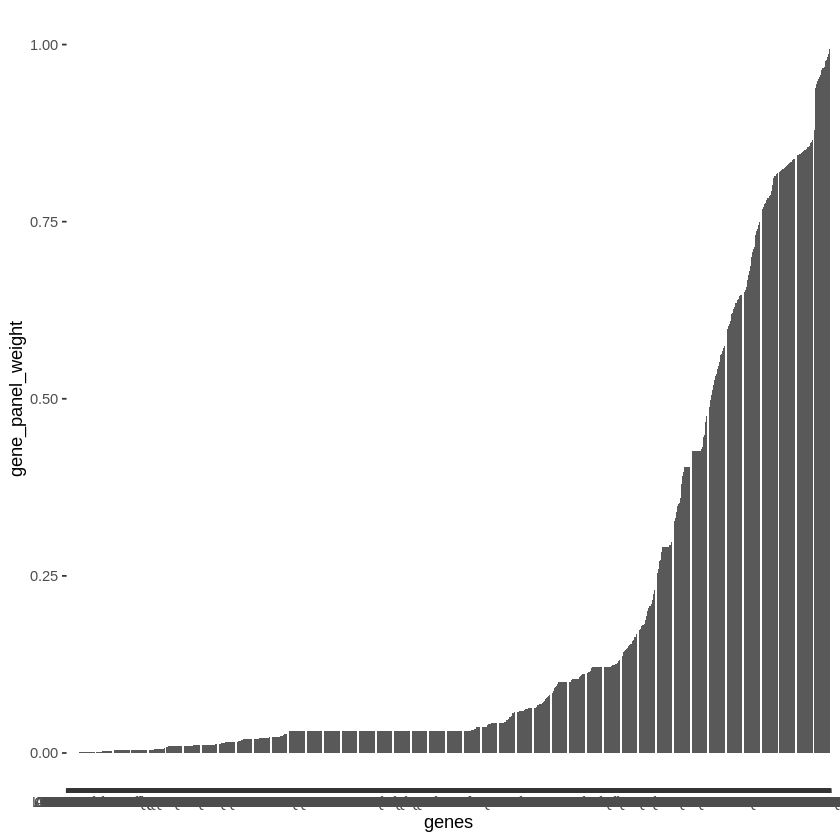

In [18]:
# We define the position based on a list sorted by weight
positions <- gene_weighted_table[order(as.numeric(gene_weighted_table$gene_panel_weight)), 1]

# Then we plot the weights, as a sanity check to see if
ggplot(gene_weighted_table, aes(x = genes, y = gene_panel_weight)) +
 geom_bar(stat="identity") +
 scale_x_discrete(limits = positions)

#### Results

We have managed to create weights based off of the frequency of use of each panel and what genes are in each panel. 

In [19]:
write.csv(gene_weighted_table, "../../derived_data/genie_v15/gene_panel_weights.csv", row.names=TRUE)

In [20]:
# This is an error check, to see if any panel_weights are NA values
err <- which(is.na(gene_weighted_table$panel_weight))
for (idx in err){
    gene_err <- gene_weighted_table$gene[idx]
    for (idx2 in gene_err){
        print(gene_count_table$weight[idx])
        }
}

To check how many genes have a weight higher or equal to 75%, we can use:

In [24]:
print(length(unique(gene_weighted_table$genes)))

count = 0

for (weight in gene_weighted_table$gene_panel_weight){
    if (weight >= 0.5){
        count = count + 1
    }
}

print(count)

count = 0

for (weight in gene_weighted_table$gene_panel_weight){
    if (weight >= 0.75){
        count = count + 1
    }
}

print(count)

[1] 2249
[1] 354
[1] 209


In [22]:
# I would like to save a list of all the genes with a weight higher or equal to 0.75
g_75 <- gene_weighted_table[which(gene_weighted_table$gene_panel_weight >= 0.75), 1]
# And 0.50
g_50 <- gene_weighted_table[which(gene_weighted_table$gene_panel_weight >= 0.50), 1]
# So that is done here :-)
write.csv(g_75, "../../derived_data/genie_v15/gene_weights_75.csv", row.names=FALSE)
write.csv(g_50, "../../derived_data/genie_v15/gene_weights_50.csv", row.names=FALSE)

To check which genes are in the top 10:

In [23]:
sorted_gene_weighted_table <- gene_weighted_table[order(-gene_weighted_table$gene_panel_weight), ]

sorted_gene_weighted_table[1:10, 1]

[1] "BRAF"   "KRAS"   "NRAS"   "TP53"   "PTEN"   "HRAS"   "CDKN2A" "IDH1"  
 [9] "KIT"    "FBXW7"